# **HEART FAILURE PREDICTION**

**PERSIAPAN**

**Mengimport Package Yang Dibutuhkan**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

**Load Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('heart_failure.csv')
df.head()

Saving heart_failure.csv to heart_failure (1).csv


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0



Penjelasan kolom : 

Event_dead 0 => Pasien Selamat

event_dead 1 => Pasien Meninggal

age = Usia Pasien (tahun )

anemia: Penurunan sel darah merah atau hemoglobin (0 = No, 1 = Yes)

creatinine_phosphokinase: Tingkat enzim CPK dalam darah (mcg/L)

diabetes: Apakah pasien memiliki diabetes? (0 = No, 1 = Yes)

ejection_fraction: Fraksi ejeksi (EF) adalah pengukuran, dinyatakan sebagai persentase, dari berapa banyak darah yang dipompa ventrikel kiri dengan setiap kontraksi (%)

high_blood_pressure :Apakah pasien memiliki hipertensi? (0 = No, 1 = Yes)

serum_kreatinin:Kandungan kreatinin didalam darah (mg/dL)

serum_sodium: Kandungan sodium didalam darah (mEq/L)

Sex = Jenis Kelamin (0 = Female, 1= Male)

Smoking = Apakah pasien merokok (0 = No, 1 = Yes)

Platelets = Kandungan trombosit didalam darah (Kiloplatelets/mL)

Time = Periode follow up (Hari)



**DATA PRAPROCESSING**

**Melihat Dimensi Data**

In [ ]:
print('Dataset ini terdiri dari {0} baris dan {1} kolom'.format(df.shape[0], df.shape[1]))

Dataset ini terdiri dari 299 baris dan 13 kolom


**Melihat Info Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Melihat ringkasan statistika deskriptif dari dataset**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Sex - Gender of patient Male = 1, Female =0

Age - Age of patient

Diabetes - 0 = No, 1 = Yes

Anaemia - 0 = No, 1 = Yes

High_blood_pressure - 0 = No, 1 = Yes

Smoking - 0 = No, 1 = Yes

DEATH_EVENT - 0 = No, 1 = Yes


**EDA (EXPLORATORY DATA ANALYSIS )**

Proporsi Label Death_Event

In [ ]:
print('Distribusi label Death_event\n', df['DEATH_EVENT'].value_counts())

Distribusi label Death_event
 0    203
1     96
Name: DEATH_EVENT, dtype: int64


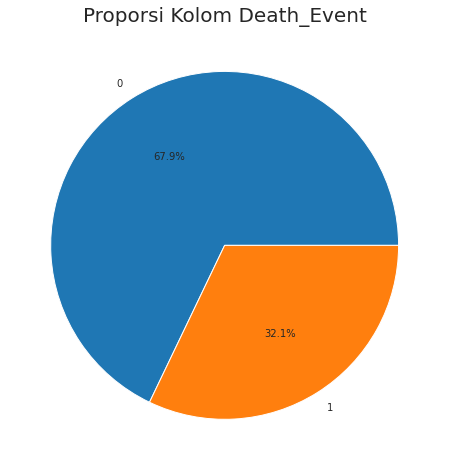

In [ ]:
plt.figure(figsize=(8,8))
label = df['DEATH_EVENT'].value_counts()
plt.pie(label.values , labels=label.index, autopct= '%1.1f%%')
plt.title('Proporsi Kolom Death_Event', fontsize=20)
plt.show()

Dapat dilihat dari Pie Cart diatas bahwa proporsi label Even_Death adalah imbalance. hal ini perlu dilakukan treatment khusus karena label yang imbalance akan mempengaruhi kualitas model. Untuk mengatasi imbalance tersebut akan dilakukan teknik SMOTE ( Synthetic Minority Oversampling Technique)

Distribusi Data 

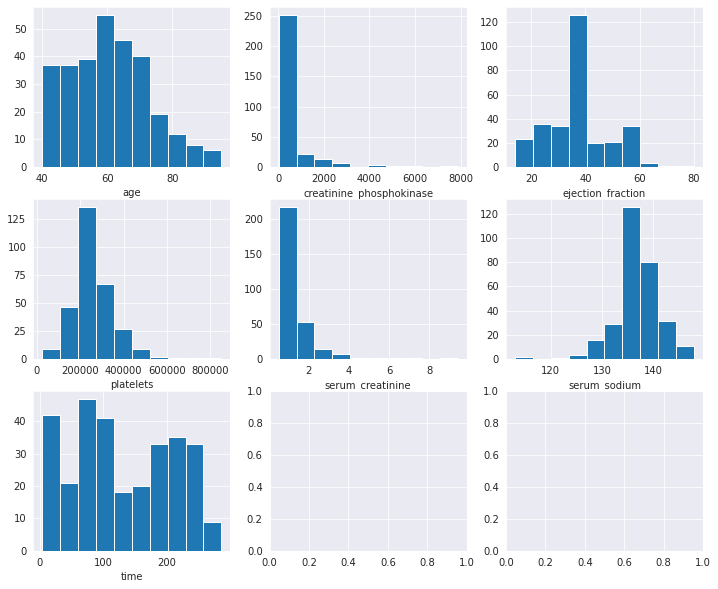

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(12,10))
ax[0][0].hist(df['age'])
ax[0][1].hist(df['creatinine_phosphokinase'])
ax[0][2].hist(df['ejection_fraction'])
ax[1][0].hist(df['platelets'])
ax[1][1].hist(df['serum_creatinine'])
ax[1][2].hist(df['serum_sodium'])
ax[2][0].hist(df['time'])

ax[0][0].set_xlabel('age')
ax[0][1].set_xlabel('creatinine_phosphokinase')
ax[0][2].set_xlabel('ejection_fraction')
ax[1][0].set_xlabel('platelets')
ax[1][1].set_xlabel('serum_creatinine')
ax[1][2].set_xlabel('serum_sodium')
ax[2][0].set_xlabel('time')

plt.show()

Dari histogram diatas dapat disimpulkan bahwa : 

•	Kebanyakan pasien berusia 60-70 tahun

•	Pasien paling banyak mempunyai nilai serum creatin dengan nilai 0

•	Ejection tertinggi yaitu dengan nilai 40

•	Nilai platelets pasien paling banyak berkisar diantara 300000 – 400000

•	Serum creatinine terbanyak berada pada nilai 0

•	Distribusi serum sodium cenderung terkumpul disebelah kanan

•	Distribusi time cukup normal






Count Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


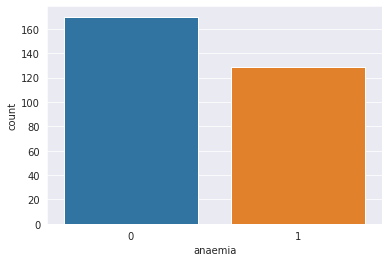

In [ ]:
sns.countplot(df['anaemia'], label='count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


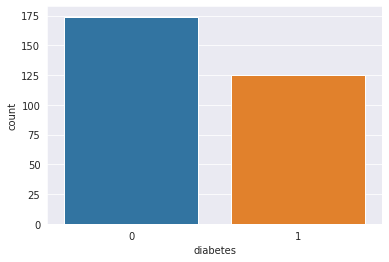

In [ ]:
sns.countplot(df['diabetes'], label='count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


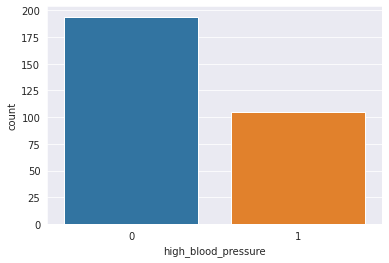

In [ ]:
sns.countplot(df['high_blood_pressure'], label='count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


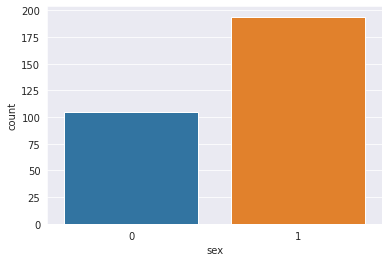

In [ ]:
sns.countplot(df['sex'], label='count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


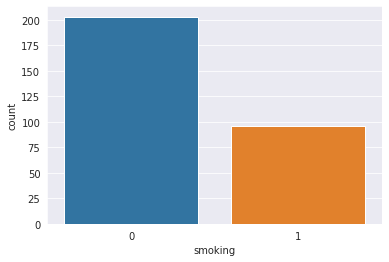

In [ ]:
sns.countplot(df['smoking'], label='count')
plt.show()

**Multivariat Analisis**

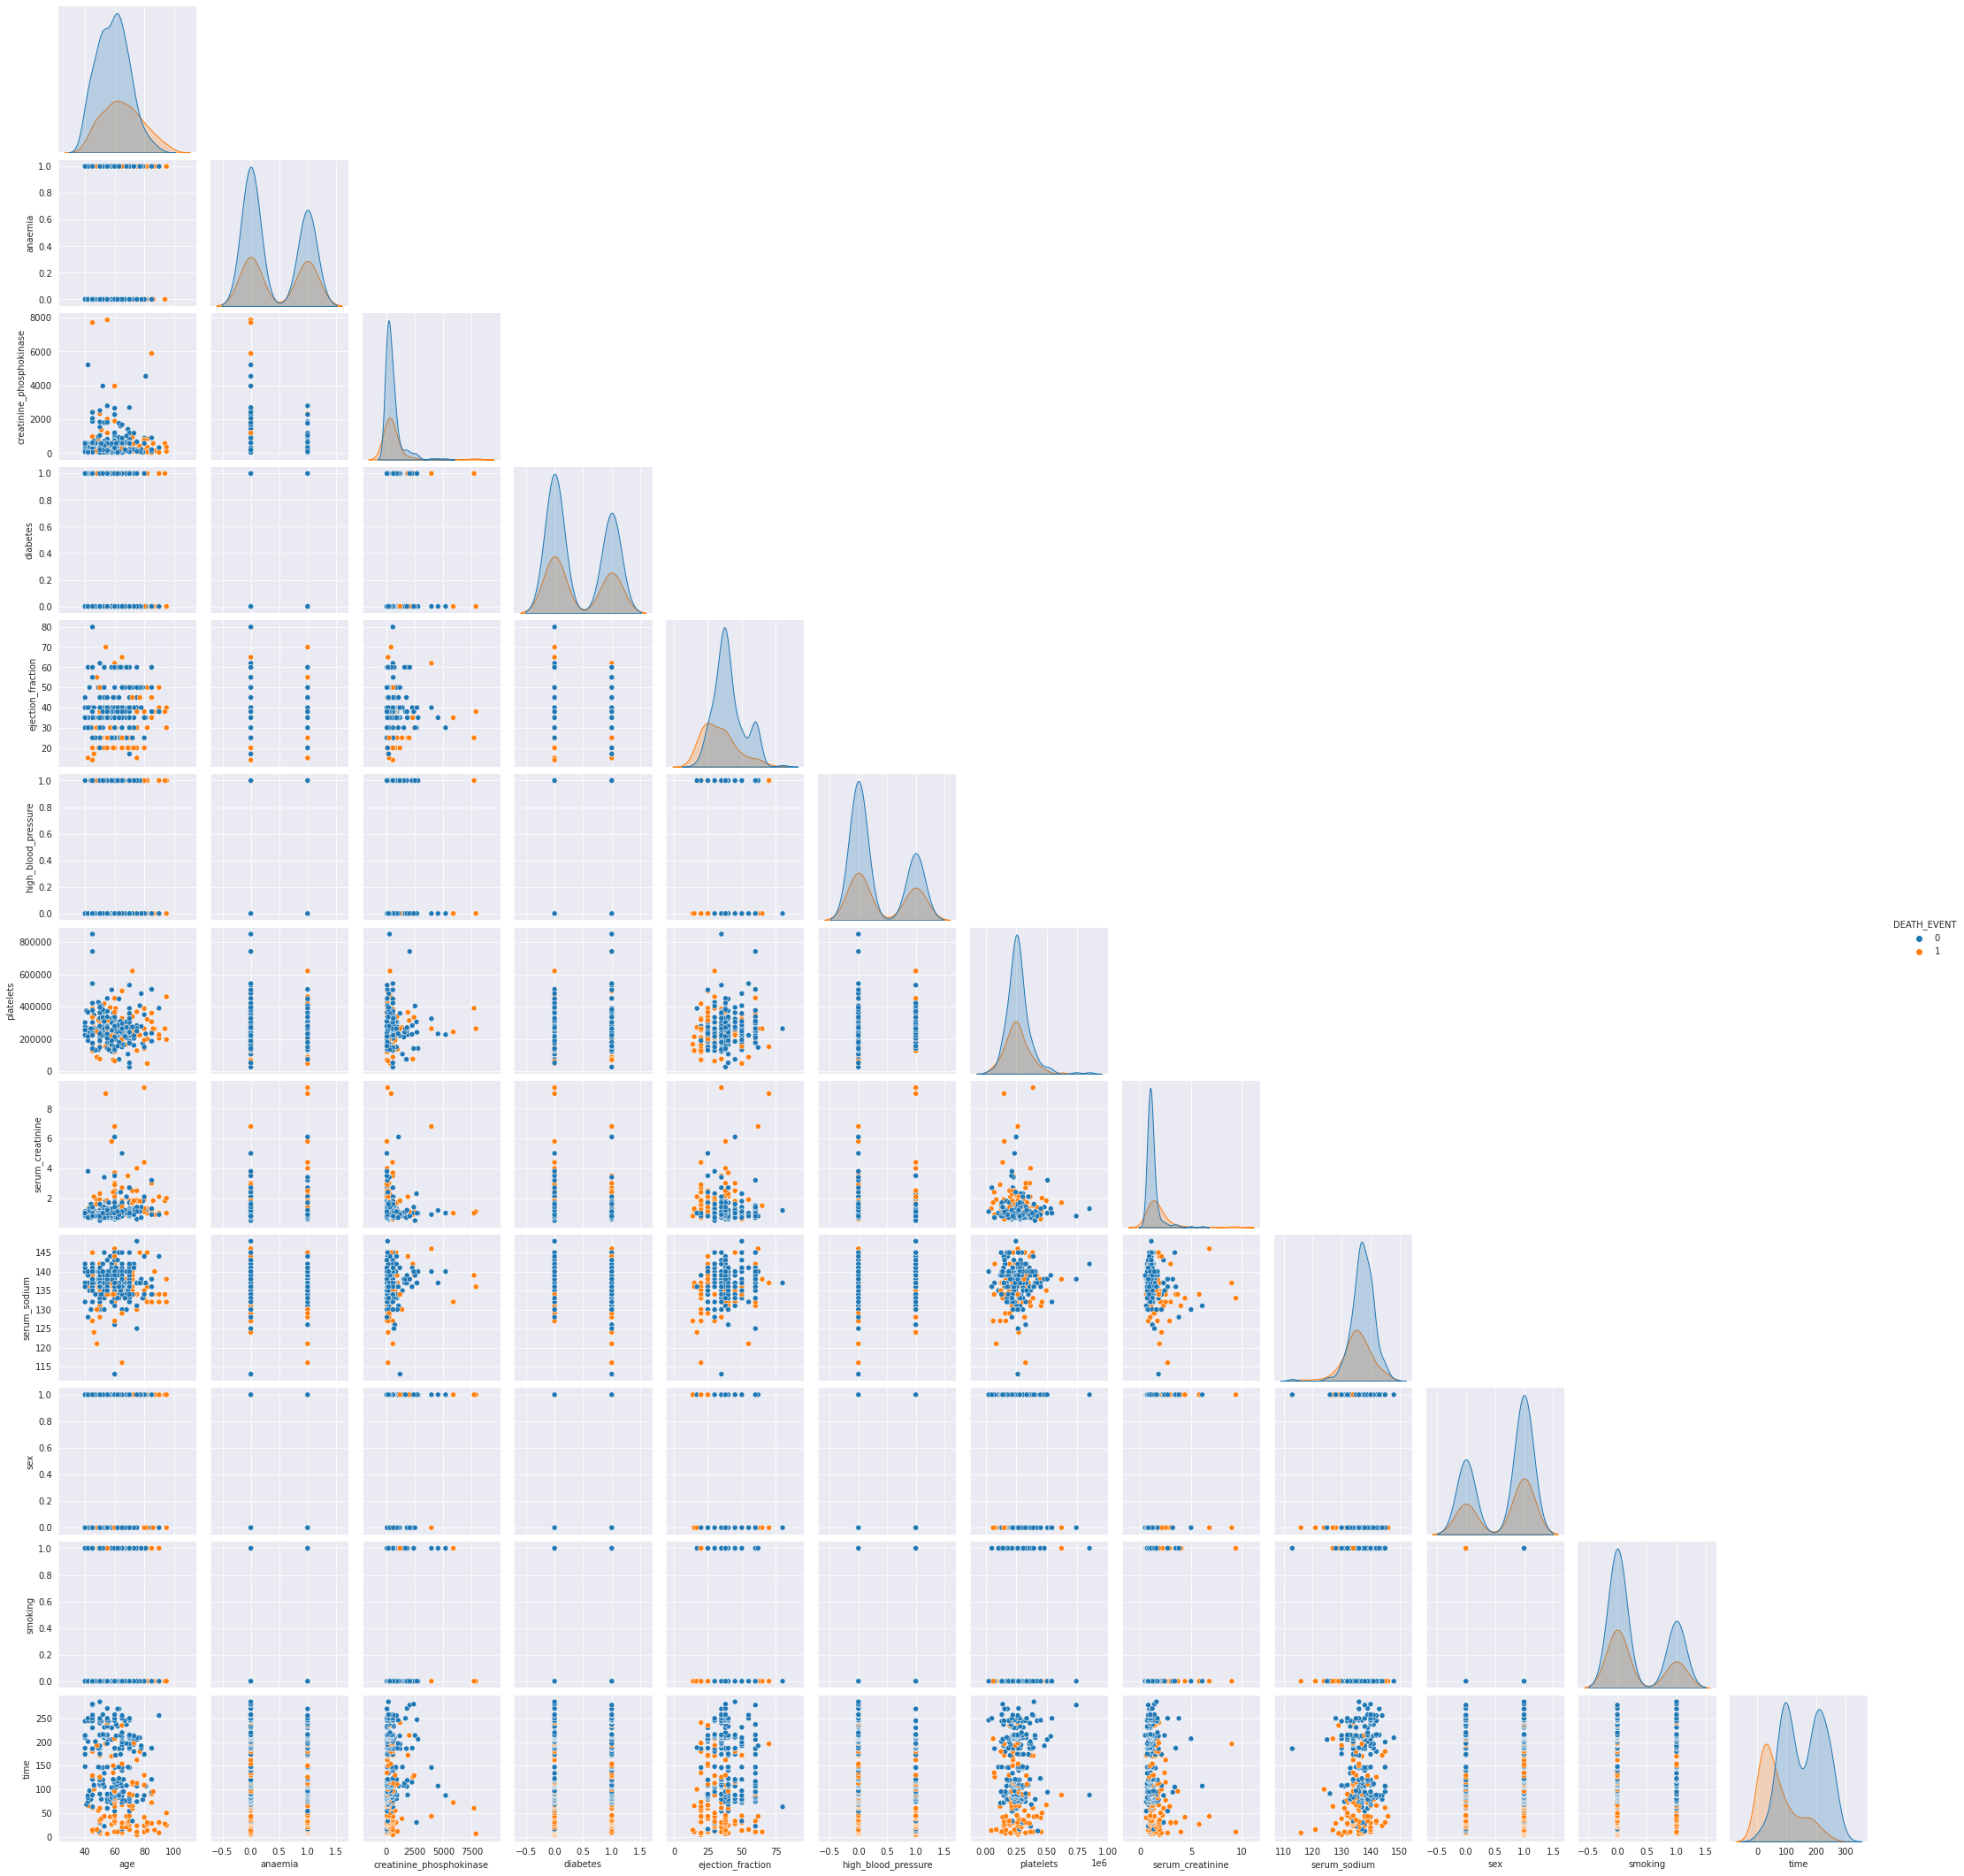

In [ ]:
sns.pairplot(df, hue='DEATH_EVENT', corner=True)
plt.show()

DATA CLEANSING

Mengecek Missing Value

In [ ]:
print('Jumlah Missing Value dari setiap kolom : \n', df.isnull().sum())

Jumlah Missing Value dari setiap kolom : 
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


Tidak terdapat Missing Values dari setiap kolom, sehingga tidak diperlukan handling Missing values, tahap selanjutnya adalah melihat korelasi dari tiap kolom terhadap label yaitu Death_Event

Feature Selection

Proses selanjutnya adalah melakukan feature selection yaitu memilih feature/kolom yang mempunyai hubungan yang kuat  terhadap label sehingga dapat mempengaruhi kualitas performa model yang akan dibuat. Proses feature selection ini menggunakan  heatmap dari library seaborn yang akan memberikan visualisasi tingkat warna serta nilai korelasi dari setiap feature terhadap label. 
Korelasi adala salah satu metode statistika yang dapat digunakan untuk mengukur seberapa besar hubungan antara satu variabel dengan variabel lainnya. Nilai dari korelasi tersebut digunakan untuk mengukur kekuatan hubungan linier antara dua variabel serta dapat menentukan arah dari korelasi tersebut apakah negatif atau positif. 

Hubungan antar variabel dikatakan positif apabila nilai salah satu variabel naik, maka nilai variabel lainnya juga naik. Sebaliknya, hubungan antar variabel dikatakan negatif apabila nilai salah satu variabel naik maka variabel yang lainnya turun. 
Suatu variabel dikatakan berkorelasi positif kuat apabila nilai koefisisen korelasi lebih besar dari 0.5 dan dikatakan berkorelasi negatif kuat apabila nilai koefisien korelasi lebih besar dari -0.5. 


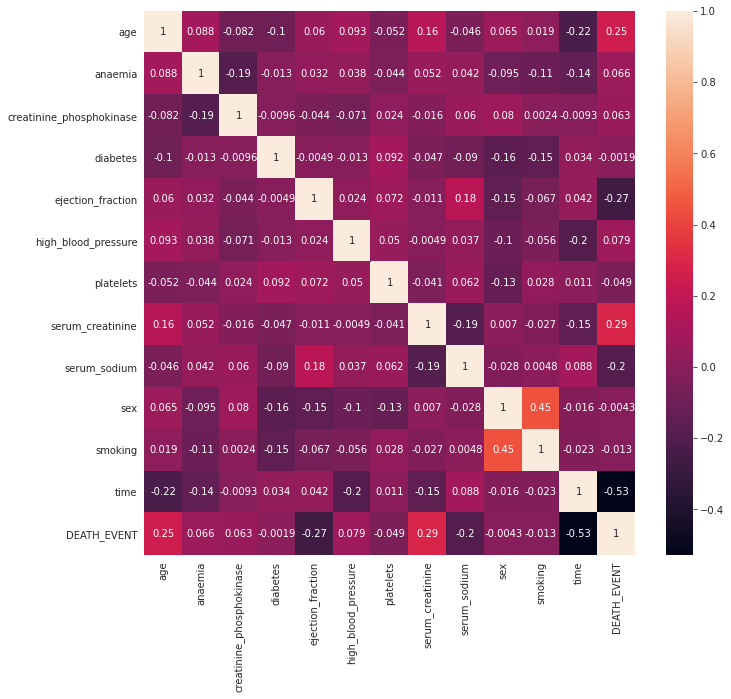

In [ ]:
plt.figure(figsize=(11,10))
sns.heatmap(df.corr(), annot=True)

plt.show()

Berdasarkan Heatmap diatas hampir semua kolom memiliki korelasi yang lemah terhadap label. Tahap feature selection ini akan memilih 3 feature yang mempunyai nilai korelasi yang lebih tinggi dibandingkan feature lain. Feature yang dipilih yaitu time yang mempunyai nilai korelasi -0.53, ejection_fraction yang mempunyai nilai korelasi -0.27 dan serum_creatinine yang mempunyai nilai korelasi 0.29. Dari ketiga feature yang dipilih yang mempunyai hubungan korelasi positif adalah feature serum_creatinine. Sedangkan feature yang mempunyai hubungan korelasi negative adalah time dan ejection_fraction. 

In [ ]:
features = df.drop(['anaemia','creatinine_phosphokinase','diabetes','high_blood_pressure','platelets','sex','smoking','age', 'serum_sodium'],axis=1)

Membuat objek baru bernama features untuk menampung fitur/kolom yang telah dilakukan feature selection

In [ ]:
features

,ejection_fraction,serum_creatinine,time,DEATH_EVENT
0,20,1.9,4,1
1,38,1.1,6,1
2,20,1.3,7,1
3,20,1.9,7,1
4,20,2.7,8,1
...,...,...,...,...
294,38,1.1,270,0
295,38,1.2,271,0
296,60,0.8,278,0
297,38,1.4,280,0


Finding and handling Outliers

Pada tahap ini akan dilakukan visualisasi box plot pada feature yang telah dilakukan proses feature selection dan dengan memerhatikan rangkuman statistik deskriptif yang telah dilakukan pada proses sebelumnya. Pada rangkuman statistik deskriptif  dapat dilihat bahwa kolom ejection_fraction diperkirakan memiliki outlier. Selanjutnya melakukan visualisasi box plot pada kolom ejection_fraction. 

Suatu Data point dikatakan outliers apabila data tersebut berada diluar boxplot (batas bawah maupun batas atas). 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


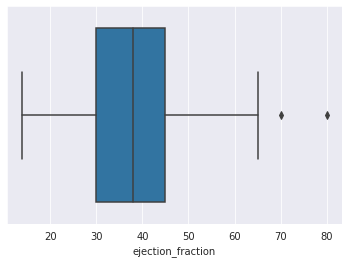

In [ ]:
sns.boxplot(features['ejection_fraction'])
plt.show()

Berdasarkan Boxplot diatas dapat dilihat bahwa terdapat 2 data poin yang berada diluar whisker pada box plot. Box plot terdiri dari box dan whisker. Panjang dari box sesuai dengan IQR, sedangkan whisker merupakan batas bawah dan batas atas  untuk menentukan outlier.  Suatu data poin disebut outlier apabila data poin tersebut berada diluar whisker atau memenuhi kondisi seperti perhitungan dibawah ini : 

•	Data poin < Batas Bawah

= Data poin < Q1 - (1,5*IQR)

•	Data poin > Batas Atas

= Data poin > Q3 + (1,5*IQR)

Pada box plot diatas data poin 70 dan 80 merupakan outlier berdasarkan perhitungan dibawah ini : 

Diketahui : 

Q1 = 30

Q3 = 45

IQR = Q3 – Q1 = 45-30 = 15

Batas Atas = Q3 + (1,5*IQR) 

= 45 + (1,5*15)

= 45 + (22,5) 

= 67,5

Berdasarkan perhitungan batas atas diatas, data poin 70 dan 80 lebih besar daripada batas atas.  


Handling Outliers

Proses selanjutnya adalah menangani outlier tersebut dengan cara memfilter data poin yang lebih besar dari Q1- (1,5*IQR) atau data poin yang lebih kecil dari Q3 + (1,5*IQR). disini akan dilakukan filtering data poin yang lebih kecil dari 70, karena 70 merupakan outlier.


In [ ]:
features = features[features['ejection_fraction']<70]

Menegcek kembali apakah masih terdapat outliers dalam fitur/kolom ejection_fraction

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


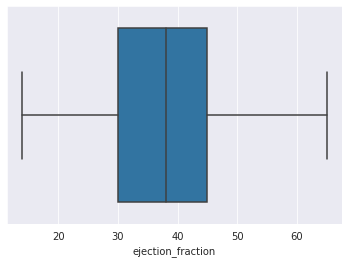

In [ ]:
sns.boxplot(features['ejection_fraction'])
plt.show()

Berdasarkan Boxplot diatas sudah tidak terdapat outlier pada Boxplot

**Pembagian Dataset / Split Data**

Proses ini membagi dataset kedalam variabel x (untuk fitur/kolom) dan y (untuk label )

In [ ]:
x = features.drop('DEATH_EVENT', axis=1)
y = features['DEATH_EVENT']


In [ ]:
print ('Kolom Feature : ')
x


Kolom Feature : 


,ejection_fraction,serum_creatinine,time
0,20,1.9,4
1,38,1.1,6
2,20,1.3,7
3,20,1.9,7
4,20,2.7,8
...,...,...,...
294,38,1.1,270
295,38,1.2,271
296,60,0.8,278
297,38,1.4,280


In [ ]:
print('Label :')
display(y)

Label :


0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 297, dtype: int64

Handling Oversampling with SMOTE (Synthetic Minority Oversampling Technique)

Teknik SMOTE dapat menangani masalah data imbalance pada label dengan cara mensintesis data atau membuat replikasi data kelas minor agar setara dengan kelas data mayor. 

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Mengecek Proporsi Label yaitu DEATH_EVENT

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


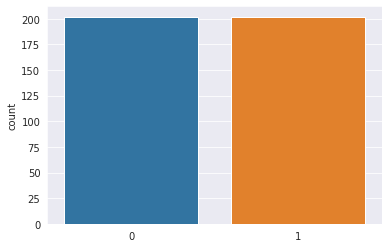

In [ ]:
sns.countplot(y)

Berdasarkan Countplot diatas proporsi kelas data 0 dan kelas data 1 pada label telah seimbang

Pembagian Data Training dan Data Testing dengan Persentase 80% dan 20%

In [ ]:
#Pembagian Data Training 80% Data Testing 20%
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

Feature Scalling

Proses feature scaling ini bertujuan agar setiap data mempunyai range nilai yang sama terhadap data yang lain. Proses feature scaling yang digunakan adalah StandardScaler. 

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print('Nilai x_train :')
print(x_train)


Nilai x_train :
[[ 2.86586268e-01  1.94069337e-01 -1.39421485e+00]
 [ 2.12821781e+00 -5.02736813e-01  1.24926174e+00]
 [-4.38094686e-01 -3.57447766e-01 -1.18028075e+00]
 [ 2.12821781e+00 -6.96315131e-01 -5.68051329e-01]
 [-1.44196615e+00  1.33625722e+00 -6.96938781e-01]
 [-5.49420159e-01  4.65154781e-01 -8.77381214e-01]
 [-1.03147164e-01 -1.15580175e-01  2.48309504e-02]
 [-9.95693155e-01 -3.09158494e-01  5.90215013e-01]
 [ 1.23567182e+00 -4.05947653e-01  1.17192927e+00]
 [-1.44196615e+00  3.00613210e-01  1.58436912e+00]
 [ 1.23567182e+00 -4.05947653e-01  1.17192927e+00]
 [-1.35933041e+00 -1.96247923e-01 -5.95259619e-01]
 [ 1.64616633e-01 -4.14729758e-01 -1.43980819e+00]
 [ 1.64616633e-01 -5.99525972e-01  8.88376879e-01]
 [-5.13518198e-01  8.31891676e-02  9.61216206e-01]
 [ 2.12821781e+00 -6.96315131e-01  2.06125269e+00]
 [-9.95693155e-01 -4.19824287e-01 -6.78529591e-01]
 [-1.03147164e-01  1.14267890e+00 -8.25826233e-01]
 [ 2.57449081e+00 -1.87910156e-02 -1.39293102e+00]
 [ 1.64616633e-

In [ ]:
print('Nilai x_test :')
print(x_test)

Nilai x_test :
[[-0.75931658 -0.54825984 -1.00473913]
 [-0.10314716 -0.21236933  1.21059551]
 [-0.99569315 -0.50273681 -0.74849376]
 [-0.10314716 -0.59952597  1.17192927]
 [ 0.34312583 -0.32851633 -0.14272274]
 [-0.12159787 -0.56231062  0.09523608]
 [-1.68422724  0.31075781 -1.38372498]
 [ 2.12821781 -0.50273681  1.53281414]
 [-0.0859028  -0.57459254  0.10548363]
 [-0.54942016 -0.50273681 -0.40049764]
 [ 1.23567182 -0.50273681 -1.04195801]
 [ 0.04270526 -0.02824248 -1.19603646]
 [-0.87052695 -0.17342619  0.47417108]
 [-0.43053811  0.12634226 -1.25760592]
 [-0.54942016 -0.40594765 -1.38004228]
 [ 2.12821781 -0.59952597 -0.14272274]
 [-1.88823914 -0.21236933 -0.68405004]
 [-0.54942016 -0.59952597  0.38571582]
 [ 0.16461663 -0.40594765 -1.44167436]
 [ 0.78939883 -0.50273681 -0.49071886]
 [ 0.34312583 -0.79310429  1.48125916]
 [ 0.34312583 -0.79310429  1.6359241 ]
 [ 0.34312583 -0.59952597 -0.1040565 ]
 [-0.54942016 -0.59952597 -0.11694525]
 [ 0.34312583 -0.30915849  0.0377197 ]
 [-0.22813

**Pelatihan Data**

In [ ]:
#Training model Random forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state=0)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

**Pengujian Model**

Confusion Matrix



In [ ]:
print('Training Accuracy :', forest.score(x_train, y_train))
print ('Testing Accuracy:', forest.score(x_test, y_test))
#Confusion Matrix
print('\nConfusion Matrix :')
y_pred = forest.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9876160990712074
Testing Accuracy: 0.9506172839506173

Confusion Matrix :
[[38  2]
 [ 2 39]]


Pada confusion matrix terdapat 4 nilai yaitu True Positive, False Positive, False Negative dan True Negative. True Positive merupakan data positif yang diprediksi benar. Pada Gambar diatas nilai True Positive sebesar 38. 

Selanjutnya False Positive adalah data negatif yang diprediksi benar, pada Gambar diatas  angka 2 merupakan nilai False Positive. Selanjutnya adalah False Negative yaitu data negatif namun diprediksi sebagai data positif, pada Gambar diatas angka 2 merupakan False Negative. Kemudian True Negative adalah data positif namun diprediksi sebagai data negatif. Pada Gambar diatas angka 39 merupakan nilai True Negative.

Classification report

In [ ]:
#Classification report
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)


Classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.95      0.95      0.95        41

    accuracy                           0.95        81
   macro avg       0.95      0.95      0.95        81
weighted avg       0.95      0.95      0.95        81



Classification report merupakan evaluasi model yang dapat menghitung metrik seperti precision, recall, accuracy, dan f1 score. 

Berdasarkan Gambar diatas hasil precision kelas data 0 s ebesar 95%, precision kelas data 1 sebesar 95%, recall kelas data 0 sebesar 95%, recall kelas data 1 sebesar 95%, f1-score kelas data 0 sebesar 95%, f1-score kelas data 1 sebesar 95% dan accuracy model sebesar 95%. 